In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
missing_values=["np.nan","N/A","None"]
df = pd.read_csv("sensor_dataset.csv",na_values=missing_values)
df

,S.No,Axial RMS Acceleration(m/sec2),Axial RMS Velocity(mm/sec),Horizontal RMS Acceleration(m/sec2),Horizontal RMS Velocity(mm/sec),Vertical RMS Acceleration(m/sec2),Vertical RMS Velocity(mm/sec),Noise (db),Temperature (degC),Current(A)
0,1,18.746,8.8190,9.5390,4.9210,10.7800,11.5220,99.356,53.216,7.30
1,2,18.291,8.9035,10.2900,6.1245,10.2645,12.1855,101.872,53.216,7.27
2,3,17.637,7.3230,9.3210,5.8490,9.0440,11.5790,101.169,53.223,7.34
3,4,19.614,NaN,10.7110,5.8060,11.4780,12.2700,NaN,53.231,7.23
4,5,18.823,7.2610,10.4575,5.6755,10.6025,11.7905,100.749,53.231,7.34
...,...,...,...,...,...,...,...,...,...,...
461,462,18.755,7.1950,10.5990,5.8745,11.0205,11.7730,98.669,53.145,8.02
462,463,17.995,7.6940,9.4200,6.2100,9.9990,14.0740,102.194,53.145,7.76
463,464,17.727,7.6590,10.9020,5.6590,NaN,11.6950,NaN,53.145,7.80
464,465,18.902,7.2800,10.5595,6.0935,11.0540,12.5725,99.519,53.145,7.67


In [18]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   S.No                                 466 non-null    int64  
 1   Axial RMS Acceleration(m/sec2)       464 non-null    float64
 2   Axial RMS Velocity(mm/sec)           462 non-null    float64
 3   Horizontal RMS Acceleration(m/sec2)  465 non-null    float64
 4   Horizontal RMS Velocity(mm/sec)      462 non-null    float64
 5   Vertical RMS Acceleration(m/sec2)    461 non-null    float64
 6   Vertical RMS Velocity(mm/sec)        463 non-null    float64
 7   Noise (db)                           460 non-null    float64
 8   Temperature (degC)                   465 non-null    float64
 9   Current(A)                           460 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 36.5 KB


S.No                                   0
Axial RMS Acceleration(m/sec2)         2
Axial RMS Velocity(mm/sec)             4
Horizontal RMS Acceleration(m/sec2)    1
Horizontal RMS Velocity(mm/sec)        4
Vertical RMS Acceleration(m/sec2)      5
Vertical RMS Velocity(mm/sec)          3
Noise (db)                             6
Temperature (degC)                     1
Current(A)                             6
dtype: int64

In [30]:
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df.drop('S.No', axis=1,inplace=True)

In [31]:
df.isnull().sum()

Axial RMS Acceleration(m/sec2)         0
Axial RMS Velocity(mm/sec)             0
Horizontal RMS Acceleration(m/sec2)    0
Horizontal RMS Velocity(mm/sec)        0
Vertical RMS Acceleration(m/sec2)      0
Vertical RMS Velocity(mm/sec)          0
Noise (db)                             0
Temperature (degC)                     0
Current(A)                             0
dtype: int64

In [32]:
df.head()

,Axial RMS Acceleration(m/sec2),Axial RMS Velocity(mm/sec),Horizontal RMS Acceleration(m/sec2),Horizontal RMS Velocity(mm/sec),Vertical RMS Acceleration(m/sec2),Vertical RMS Velocity(mm/sec),Noise (db),Temperature (degC),Current(A)
0,18.746,8.81900,9.5390,4.9210,10.7800,11.5220,99.356,53.216,7.30
1,18.291,8.90350,10.2900,6.1245,10.2645,12.1855,101.872,53.216,7.27
2,17.637,7.32300,9.3210,5.8490,9.0440,11.5790,101.169,53.223,7.34
3,19.614,7.65125,10.7110,5.8060,11.4780,12.2700,101.393,53.231,7.23
4,18.823,7.26100,10.4575,5.6755,10.6025,11.7905,100.749,53.231,7.34


In [33]:
df.describe()

,Axial RMS Acceleration(m/sec2),Axial RMS Velocity(mm/sec),Horizontal RMS Acceleration(m/sec2),Horizontal RMS Velocity(mm/sec),Vertical RMS Acceleration(m/sec2),Vertical RMS Velocity(mm/sec),Noise (db),Temperature (degC),Current(A)
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.00000
mean,18.629914,7.693624,10.329491,5.673703,10.620262,11.823086,101.446700,54.626172,7.98183
std,1.062852,0.794801,0.606822,0.518149,0.561908,1.114278,2.610421,2.595269,0.73994
min,15.819000,5.849000,8.674000,4.285000,9.044000,9.312000,90.012000,52.473000,7.02000
25%,17.951875,7.196500,9.942500,5.317875,10.246500,11.017250,99.687250,53.145000,7.52000
50%,18.580250,7.651250,10.324000,5.670750,10.594000,11.755000,101.393000,53.208000,7.66000
75%,19.308875,8.101500,10.705875,5.959250,10.979625,12.403000,103.242750,55.600000,8.28000
max,22.642000,12.326000,12.082000,7.789000,12.390000,16.913000,107.600000,65.100000,10.16000


In [34]:
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]
std_dev_values = df.std()

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_dev_values)

Mean:
 Axial RMS Acceleration(m/sec2)          18.629914
Axial RMS Velocity(mm/sec)               7.693624
Horizontal RMS Acceleration(m/sec2)     10.329491
Horizontal RMS Velocity(mm/sec)          5.673703
Vertical RMS Acceleration(m/sec2)       10.620262
Vertical RMS Velocity(mm/sec)           11.823086
Noise (db)                             101.446700
Temperature (degC)                      54.626172
Current(A)                               7.981830
dtype: float64

Median:
 Axial RMS Acceleration(m/sec2)          18.58025
Axial RMS Velocity(mm/sec)               7.65125
Horizontal RMS Acceleration(m/sec2)     10.32400
Horizontal RMS Velocity(mm/sec)          5.67075
Vertical RMS Acceleration(m/sec2)       10.59400
Vertical RMS Velocity(mm/sec)           11.75500
Noise (db)                             101.39300
Temperature (degC)                      53.20800
Current(A)                               7.66000
dtype: float64

Mode:
 Axial RMS Acceleration(m/sec2)          20.02600
Axial

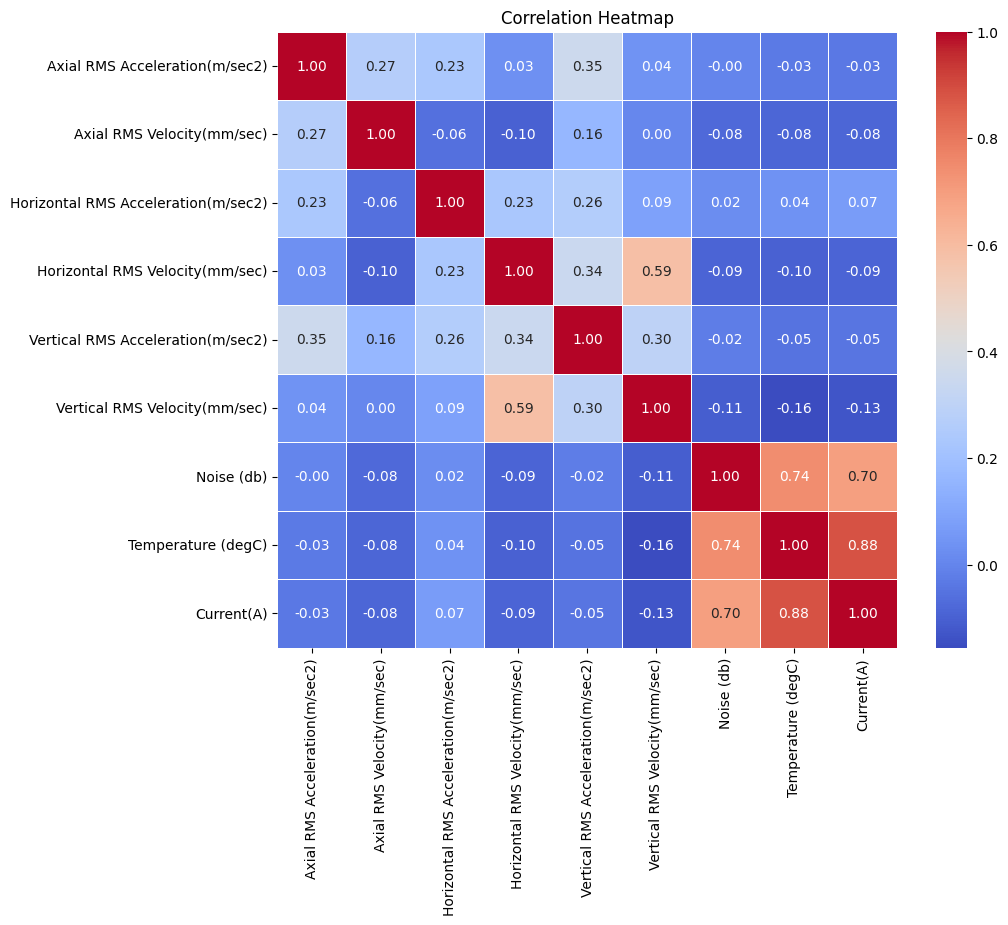

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

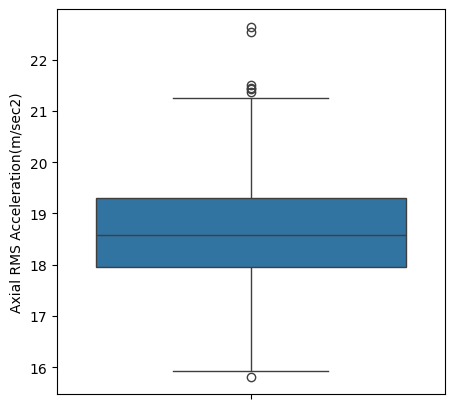

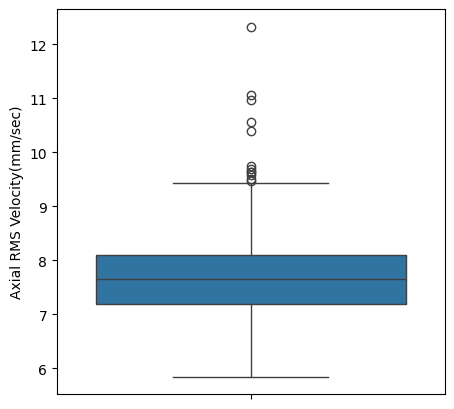

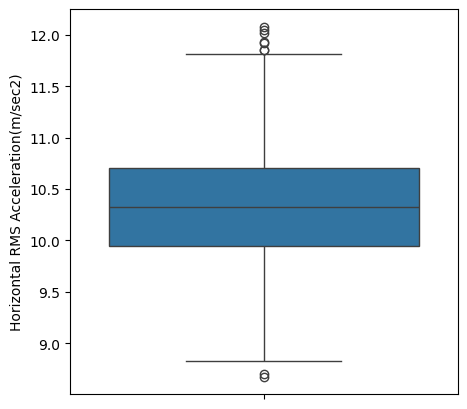

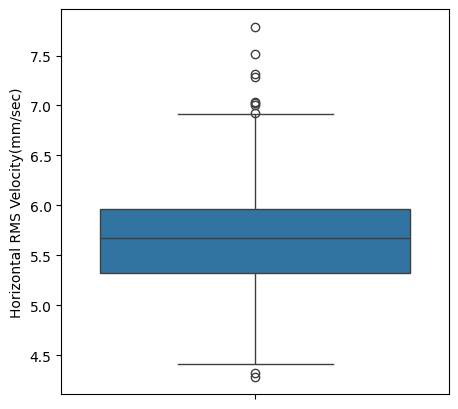

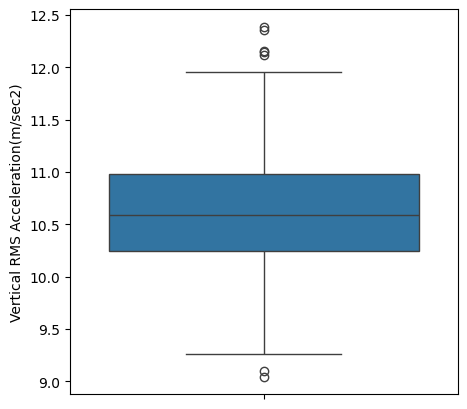

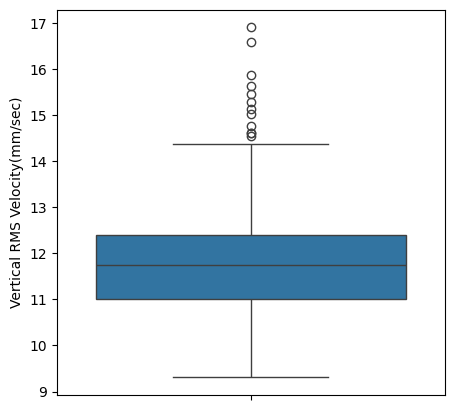

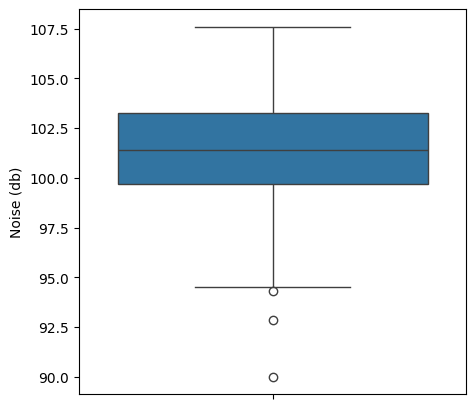

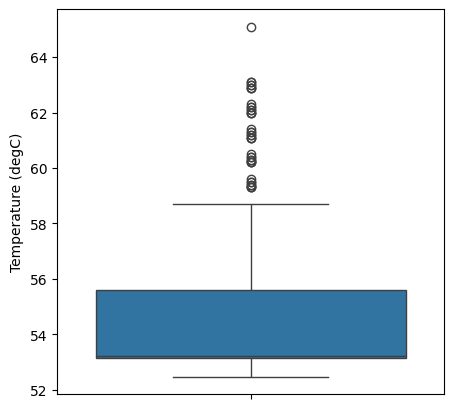

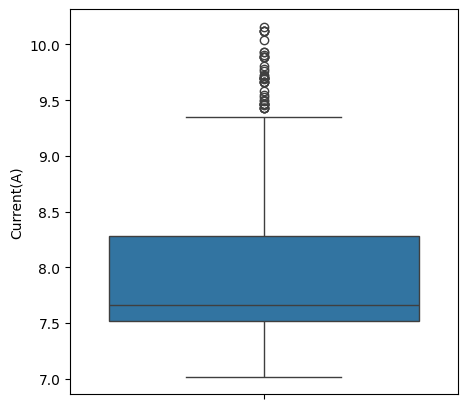

In [44]:
for col in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col])
plt.show()

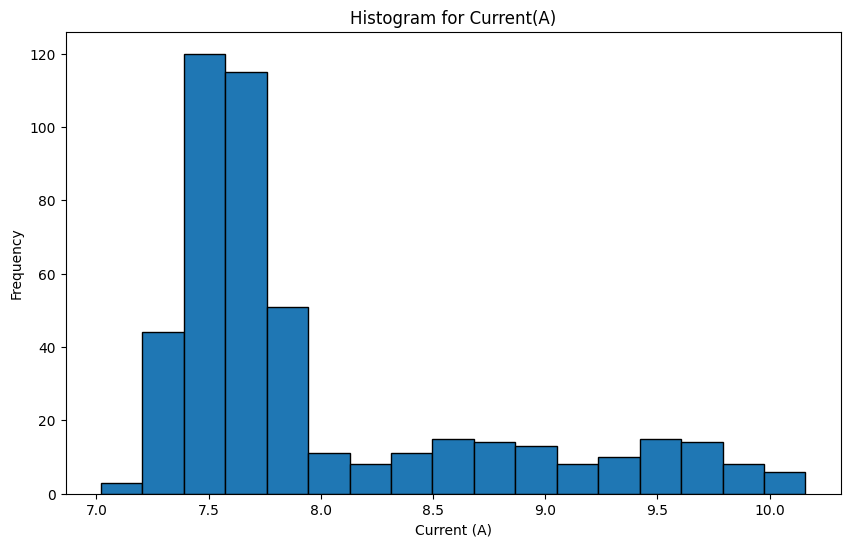

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['Current(A)'], bins='auto', edgecolor='black')
plt.title('Histogram for Current(A)')
plt.xlabel('Current (A)')
plt.ylabel('Frequency')
plt.show()

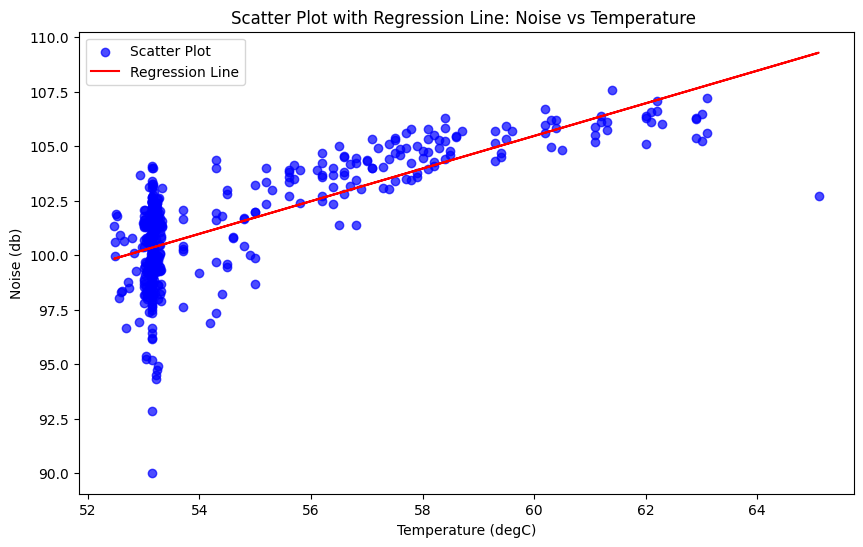

In [53]:
x = df['Temperature (degC)']
y = df['Noise (db)']

# Fit a simple linear regression model using numpy.polyfit
slope, intercept = np.polyfit(x, y, 1)

# Create the regression line
regression_line = slope * x + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Scatter Plot')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line: Noise vs Temperature ')
plt.xlabel('Temperature (degC)')
plt.ylabel('Noise (db)')
plt.legend()
plt.show()


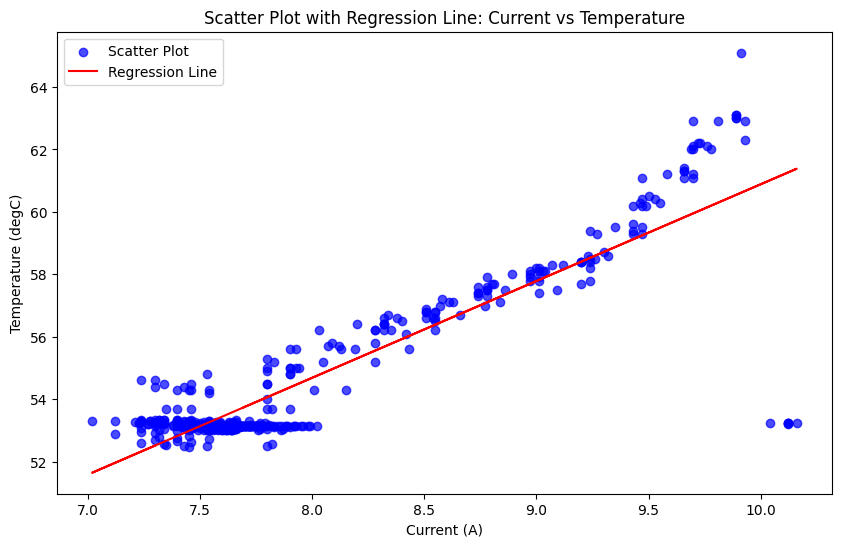

In [54]:
x = df['Current(A)']
y = df['Temperature (degC)']

# Fit a simple linear regression model using numpy.polyfit
slope, intercept = np.polyfit(x, y, 1)

# Create the regression line
regression_line = slope * x + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Scatter Plot')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line: Current vs Temperature')
plt.xlabel('Current (A)')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()

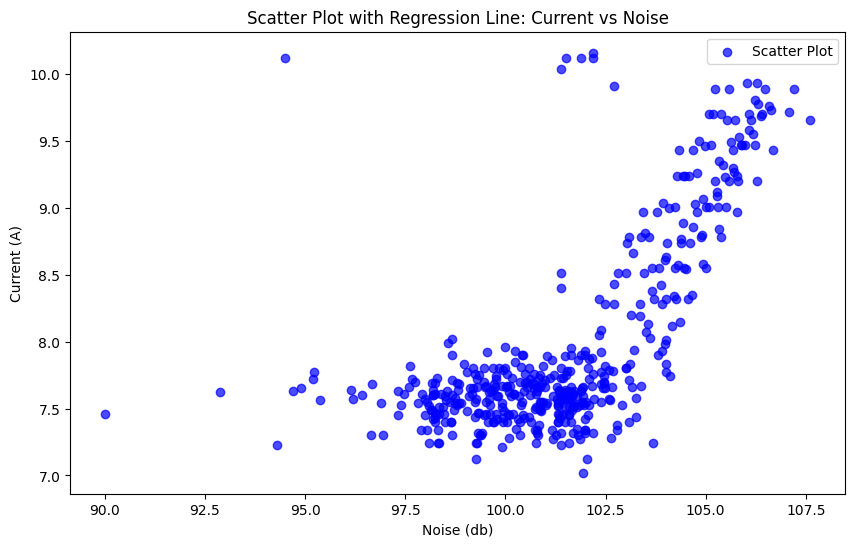

In [55]:
x = df['Noise (db)']
y = df['Current(A)']


# Plot the scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Scatter Plot')
plt.title('Scatter Plot with Regression Line: Current vs Noise')
plt.xlabel('Noise (db)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()

In [77]:
from statsmodels.stats.weightstats import ztest

population_mean=df['Temperature (degC)'].mean()
print("The population mean is",population_mean)
sample=df['Temperature (degC)'][112:223]# at 223 maintence is carried out
sample_mean=df['Temperature (degC)'][112:223].mean()
print("The sample mean obtained prior to maintenance is",sample_mean)
stat_val,p=ztest(sample,value=population_mean)
print(stat_val,p)
if p>0.05:
    print("Null Hypothesis is accepted,There is no significant difference in means.")
else:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")


The population mean is 54.62617167381974
The sample mean obtained prior to maintenance is 58.67297297297297
20.363695601407688 3.510776057963329e-92
Reject the null hypothesis. The sample mean is significantly different from the population mean.


In [52]:
import scipy.stats as stats

noise_data = df['Noise (db)']

temperature_data = df['Temperature (degC)']

current_data = df['Current(A)']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(noise_data, temperature_data, current_data)

# Print
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

F-Statistic: 216576.16119582255
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in means.


In [56]:
df.columns

Index(['Axial RMS Acceleration(m/sec2)', 'Axial RMS Velocity(mm/sec)',
       'Horizontal RMS Acceleration(m/sec2)',
       'Horizontal RMS Velocity(mm/sec)', 'Vertical RMS Acceleration(m/sec2)',
       'Vertical RMS Velocity(mm/sec)', 'Noise (db)', 'Temperature (degC)',
       'Current(A)'],
      dtype='object')

0.85


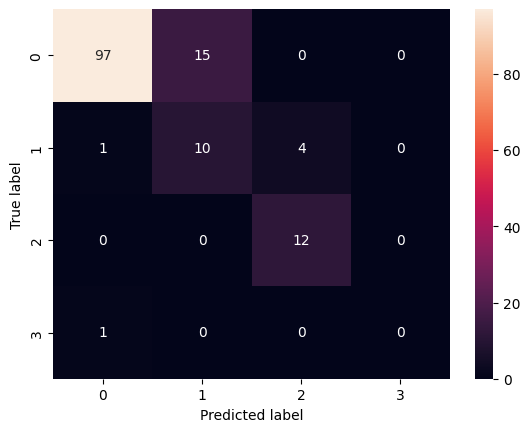

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

y=df['Current(A)']
x=df.drop('Current(A)',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
S= StandardScaler()
x_train = S.fit_transform(x_train)
x_test = S.fit_transform(x_test)
model = KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
# Convert to the same data type
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel ("Predicted label") 
plt.ylabel ("True label")
plt.show()